This file has code which uses the toxicity labelled emotes in HasanAbi's channel, the potentially toxic HasanAbi emotes we got from using t-SNE and toxic global emotes extracted from HasanAbi's channel. These emotes as seeds in the embedding space to determine which emotes in other channels (like Pokimane or xQC) are also toxic. We use cosine similarity to compare the embeddings. 

# Read csv files needed

In [1]:
import numpy as np
import pandas as pd
import csv

In [ ]:
#Read channel emotes csv file
channel_emotes_df = pd.read_csv("channel_emotes.csv")

#list of channels which we will compare the harmful emotes we extracted from HasanAbi's channel to in embedding space
channels_to_compare_HasanAbiemotesTo = ["pokimane", "xQc"]

In [3]:
# Renaming columns that start with numbers to avoid potential conflict with pandas 
channel_emotes_df.columns = ['Col_' + str(col) if col[0].isdigit() else col for col in channel_emotes_df.columns]
channel_emotes_df.fillna("", inplace = True) #fill nulls with empty string
channel_emotes_df = channel_emotes_df.reset_index(drop = True)

In [6]:
emotes_to_compare_to = channel_emotes_df[channels_to_compare_HasanAbiemotesTo]
pokimane_emotes = emotes_to_compare_to[["pokimane"]]
xQc_emotes = emotes_to_compare_to[["xQc"]]
print(pokimane_emotes)
print(xQc_emotes)

    pokimane
0      poki1
1      poki2
2      poki3
3      poki4
4      poki5
..       ...
821         
822         
823         
824         
825         

[826 rows x 1 columns]
         xQc
0       xqcA
1      xqcAm
2    xqcArm1
3    xqcArm2
4       xqcC
..       ...
821         
822         
823         
824         
825         

[826 rows x 1 columns]


In [7]:
#Filter out empty cells in the list of pokimane emotes
print((pokimane_emotes == '').sum()) #Number of empty strings in pokimane emotes
print(type(pokimane_emotes))
pokimane_emotes = pokimane_emotes[(pokimane_emotes != '').all(axis = 1)].reset_index(drop = True)
print(pokimane_emotes)

#Filter out empty cells in the list of xQc emotes
print((xQc_emotes == '').sum()) #Number of empty strings in xQc emotes
print(type(xQc_emotes))
xQc_emotes = xQc_emotes[(xQc_emotes != '').all(axis = 1)].reset_index(drop = True)
print(xQc_emotes)


pokimane    532
dtype: int64
<class 'pandas.core.frame.DataFrame'>
         pokimane
0           poki1
1           poki2
2           poki3
3           poki4
4           poki5
..            ...
289  widepeepoSad
290          Kapp
291     PokiChomp
292           Hmm
293      KKomrade

[294 rows x 1 columns]
xQc    679
dtype: int64
<class 'pandas.core.frame.DataFrame'>
           xQc
0         xqcA
1        xqcAm
2      xqcArm1
3      xqcArm2
4         xqcC
..         ...
142   xqcSmash
143    xqcSpin
144  xqcTechno
145    xqKaren
146   yikesJAM

[147 rows x 1 columns]


In [8]:
#Reading harmful emote_embedding file for HasanAbi emotes (with some global ones as well)
harmful_emotes_embeddings_df = pd.read_csv("harmfulemote_with_embeddingvector.csv")

#Filter out harmful emotes which do not have an embedding 
harmful_emotes_embeddings_df = harmful_emotes_embeddings_df[harmful_emotes_embeddings_df["embedding"] != 'Does not exist'].reset_index(drop = True)
print(harmful_emotes_embeddings_df)  


               Emote  Global emote Channel emote  \
0              Gayge          True         FALSE   
1             monkaS          True         FALSE   
2           has0head         False      HasanAbi   
3          hasSammie         False      HasanAbi   
4            PoroSad          True         FALSE   
5       StinkyCheese          True         FALSE   
6            hasKapp         False      HasanAbi   
7           hasSilly         False      HasanAbi   
8              KKona          True         FALSE   
9         HarleyWink          True         FALSE   
10        DarkKnight          True         FALSE   
11  TransgenderPride          True         FALSE   
12                :P          True         FALSE   

                                            embedding  
0   [-3.37206700e-02  3.80156040e-01  6.06820340e-...  
1   [ 3.88217840e-01  7.30623100e-01  4.28267800e-...  
2   [ 1.37839720e-01 -3.40588200e-02  3.96217230e-...  
3   [-0.4447784   0.03827794 -0.7981958   0.499

In [9]:
#Reading harmful HasanAbi emotes (with some global emotes) dataframe (emote and embedding columns) into dictionary where each embedding is represnted as a numpy array
harmful_emote_embedding_dict = {}

#go through each row
for index, row in harmful_emotes_embeddings_df.iterrows():
    #print(row["Emote"]) #string

    # Remove square brackets and split the string
    elements = row["embedding"].replace('[', '').replace(']', '').split()
    #Convert to numpy array
    arr = np.array(elements, dtype=float)
        
    harmful_emote_embedding_dict[row["Emote"]] = arr

print(harmful_emote_embedding_dict)


{'Gayge': array([-3.37206700e-02,  3.80156040e-01,  6.06820340e-01, -4.56055760e-01,
        3.76460050e-01,  5.39094900e-01,  9.99747200e-01,  7.12787600e-01,
       -6.45515140e-01, -3.43339300e-01, -1.15315890e+00, -2.93419960e-01,
       -2.93072070e-01,  1.20117660e-01,  1.29502820e+00,  1.10862860e-01,
        5.48172700e-01,  3.11908720e-01,  1.58058690e+00, -3.09202080e-01,
       -1.27758610e+00,  1.59475180e-01,  6.95956600e-01, -4.17327900e-01,
        1.31156880e-01, -2.08081540e-01,  4.98702400e-01,  5.78100500e-01,
       -2.58818500e-01,  1.23826460e+00,  4.52411650e-01,  3.32316250e-01,
       -3.32977860e-01, -4.07840160e-01,  6.39425600e-01,  2.57914630e-02,
        3.80488600e-01,  2.82907130e-01,  5.80577800e-01,  1.20317146e-01,
       -3.85788650e-01, -5.43688600e-02,  8.98294400e-01, -8.84792030e-01,
        5.17744660e-01, -1.38409210e+00,  5.09190560e-01,  2.46646670e-01,
        9.49974700e-01, -5.65495250e-01, -2.49869230e-01,  1.94895790e-01,
        5.82316

In [10]:
#read emote embedding space into dataframe. Each row corresponds to an emote where every emote is represented as vector of 500 numbers (made using Word2Vec model)
embeddings_df = pd.read_csv("emote_embeddings.tsv", sep = "\t", encoding='utf-8-sig', header = None, quoting= csv.QUOTE_NONE)
print(embeddings_df)

            0         1         2         3         4         5         6    \
0      1.286686  0.975437 -0.105877  0.404266 -0.069233  0.262404  0.398642   
1      0.529400  0.667009 -0.286177  0.307736  0.286603 -0.901467 -0.519312   
2      0.743785  1.555274  1.418502  0.394715 -0.421091 -0.952254  0.439094   
3      0.043058  0.305662  0.128614 -0.744834 -0.107481 -0.263151  0.488091   
4      1.025381  0.266222  0.659756  0.703869  0.033678  0.297028 -0.840579   
...         ...       ...       ...       ...       ...       ...       ...   
65261  0.123776 -0.046080 -0.207358  0.306132 -0.025957  0.054415 -0.058345   
65262 -0.078786 -0.208091 -0.120529  0.192288 -0.080695  0.001563  0.107449   
65263  0.035936  0.121559  0.153296  0.225215  0.017556 -0.115271  0.007538   
65264 -0.010854 -0.175074 -0.021993  0.171712  0.091793  0.198943 -0.111441   
65265 -0.039198 -0.101730  0.035865  0.102303  0.016584  0.064804  0.012547   

            7         8         9    ...       490 

In [11]:
#read emote labels into dataframe.
labels_df = pd.read_csv("emote_labels.tsv", sep = '\t', encoding='utf-8-sig', quoting= csv.QUOTE_NONE)
print(labels_df)

               word          source
0               LUL   GLOBAL_TWITCH
1                <3   GLOBAL_TWITCH
2              Clap      GLOBAL_7TV
3                gg  TWITCH_CHANNEL
4                :)   GLOBAL_TWITCH
...             ...             ...
65261  brucegbatman  TWITCH_CHANNEL
65262   matthewbruh  TWITCH_CHANNEL
65263    maxyyagony  TWITCH_CHANNEL
65264     maximumyk  TWITCH_CHANNEL
65265   foggedcorgi  TWITCH_CHANNEL

[65266 rows x 2 columns]


# Normalizing embedding vectors to unit length

In [12]:
# Calculate the magnitude of each row vector (axis=1)
norms = np.linalg.norm(embeddings_df.values, axis=1)

# Normalize each row to unit length
embeddings_df = embeddings_df.div(norms, axis=0)

print(embeddings_df)

            0         1         2         3         4         5         6    \
0      0.085742  0.065001 -0.007055  0.026939 -0.004614  0.017486  0.026565   
1      0.028032  0.035318 -0.015153  0.016295  0.015176 -0.047733 -0.027498   
2      0.041826  0.087458  0.079767  0.022196 -0.023679 -0.053548  0.024692   
3      0.002820  0.020017  0.008423 -0.048777 -0.007039 -0.017233  0.031963   
4      0.062584  0.016249  0.040268  0.042960  0.002055  0.018129 -0.051304   
...         ...       ...       ...       ...       ...       ...       ...   
65261  0.037651 -0.014017 -0.063075  0.093121 -0.007896  0.016552 -0.017748   
65262 -0.020444 -0.053997 -0.031276  0.049896 -0.020939  0.000406  0.027882   
65263  0.014289  0.048335  0.060955  0.089552  0.006981 -0.045835  0.002997   
65264 -0.004011 -0.064693 -0.008127  0.063451  0.033919  0.073513 -0.041179   
65265 -0.020605 -0.053474  0.018852  0.053776  0.008718  0.034064  0.006595   

            7         8         9    ...       490 

In [13]:
print(embeddings_df)
# Calculate the norms of each row (axis=1)
norms = np.linalg.norm(embeddings_df.values, axis=1)

print(norms)

            0         1         2         3         4         5         6    \
0      0.085742  0.065001 -0.007055  0.026939 -0.004614  0.017486  0.026565   
1      0.028032  0.035318 -0.015153  0.016295  0.015176 -0.047733 -0.027498   
2      0.041826  0.087458  0.079767  0.022196 -0.023679 -0.053548  0.024692   
3      0.002820  0.020017  0.008423 -0.048777 -0.007039 -0.017233  0.031963   
4      0.062584  0.016249  0.040268  0.042960  0.002055  0.018129 -0.051304   
...         ...       ...       ...       ...       ...       ...       ...   
65261  0.037651 -0.014017 -0.063075  0.093121 -0.007896  0.016552 -0.017748   
65262 -0.020444 -0.053997 -0.031276  0.049896 -0.020939  0.000406  0.027882   
65263  0.014289  0.048335  0.060955  0.089552  0.006981 -0.045835  0.002997   
65264 -0.004011 -0.064693 -0.008127  0.063451  0.033919  0.073513 -0.041179   
65265 -0.020605 -0.053474  0.018852  0.053776  0.008718  0.034064  0.006595   

            7         8         9    ...       490 

In [14]:
# Convert dictionary values to NumPy array
vectors_array = np.array(list(harmful_emote_embedding_dict.values()))

# Calculate the norms of each vector
norms = np.linalg.norm(vectors_array, axis=1)

# Normalize each vector to unit length
harmful_emote_embedding_dict = {key: harmful_emote_embedding_dict[key] / norms[i] for i, key in enumerate(harmful_emote_embedding_dict)}


print(harmful_emote_embedding_dict)

{'Gayge': array([-2.30869767e-03,  2.60275186e-02,  4.15461705e-02, -3.12240199e-02,
        2.57744713e-02,  3.69093242e-02,  6.84480478e-02,  4.88012567e-02,
       -4.41954238e-02, -2.35068474e-02, -7.89514345e-02, -2.00891020e-02,
       -2.00652836e-02,  8.22389834e-03,  8.86645666e-02,  7.59026516e-03,
        3.75308390e-02,  2.13549415e-02,  1.08215445e-01, -2.11696304e-02,
       -8.74703870e-02,  1.09185250e-02,  4.76489163e-02, -2.85725032e-02,
        8.97970247e-03, -1.42463767e-02,  3.41438373e-02,  3.95798565e-02,
       -1.77201007e-02,  8.47782265e-02,  3.09745246e-02,  2.27521503e-02,
       -2.27974477e-02, -2.79229217e-02,  4.37785013e-02,  1.76582169e-03,
        2.60502874e-02,  1.93693373e-02,  3.97494657e-02,  8.23755622e-03,
       -2.64131572e-02, -3.72238335e-03,  6.15020458e-02, -6.05776012e-02,
        3.54475724e-02, -9.47623582e-02,  3.48619129e-02,  1.68867520e-02,
        6.50403559e-02, -3.87168335e-02, -1.71073858e-02,  1.33436096e-02,
        3.98684

In [15]:
#Verifying that all vectors are unit length
for key in harmful_emote_embedding_dict: 
    print(np.linalg.norm(harmful_emote_embedding_dict[key]))

0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999


# Mapping Pokimane emotes to their embedding vectors

In [16]:
emotes_used = pokimane_emotes["pokimane"]
print(emotes_used)
print(type(emotes_used))

0             poki1
1             poki2
2             poki3
3             poki4
4             poki5
           ...     
289    widepeepoSad
290            Kapp
291       PokiChomp
292             Hmm
293        KKomrade
Name: pokimane, Length: 294, dtype: object
<class 'pandas.core.series.Series'>


In [17]:
pokimane_emote_embedding_df = emotes_used.to_frame()
pokimane_emote_embedding_df["embedding"] = np.nan

index = 0
for current_emote in emotes_used: #go through each pokimane emote
    
    # Search for the index of where we find this emote in the labels dataframe
    matching_index = labels_df.index[labels_df['word'] == current_emote].tolist()
    
    if len(matching_index) == 0: #maybe emote is stored in lowercase form
        matching_index = labels_df.index[labels_df['word'].str.lower() == current_emote.lower()].tolist()

    if len(matching_index) == 0: #if emote was not found in labels dataframe
        pokimane_emote_embedding_df.at[index, "embedding"] = "Does not exist"
        index += 1
        continue
    
    #Retrieve the 500 element vector corresponding to this emote using the matching_index
    embedding_vector = embeddings_df.iloc[matching_index[0]].values

    pokimane_emote_embedding_df.iloc[index, pokimane_emote_embedding_df.columns.get_loc("embedding")] = np.array_str(embedding_vector)
    index += 1

print(pokimane_emote_embedding_df)

         pokimane                                          embedding
0           poki1  [-0.00100108 -0.00291804 -0.01004408  0.069632...
1           poki2  [-0.00826234 -0.01375381 -0.05142222  0.048788...
2           poki3  [ 0.02662514  0.01451371 -0.05134408  0.039989...
3           poki4  [ 3.60516510e-02  3.07585671e-02 -4.06845745e-...
4           poki5  [-1.92463238e-02 -9.22862007e-03  5.29547513e-...
..            ...                                                ...
289  widepeepoSad                                     Does not exist
290          Kapp                                     Does not exist
291     PokiChomp                                     Does not exist
292           Hmm                                     Does not exist
293      KKomrade                                     Does not exist

[294 rows x 2 columns]


In [17]:
print((pokimane_emote_embedding_df["embedding"] == 'Does not exist').sum()) #Number of pokimane emotes which do NOT have any embedding vector.

#Filter out Pokimane emotes which don't have an embedding since we cannot compute the similarity of those emotes to the HasanAbi emotes
pokimane_emote_embedding_df = pokimane_emote_embedding_df[pokimane_emote_embedding_df["embedding"] != 'Does not exist'].reset_index(drop = True)
print(pokimane_emote_embedding_df)


213
        pokimane                                          embedding
0          poki1  [-0.00100108 -0.00291804 -0.01004408  0.069632...
1          poki2  [-0.00826234 -0.01375381 -0.05142222  0.048788...
2          poki3  [ 0.02662514  0.01451371 -0.05134408  0.039989...
3          poki4  [ 3.60516510e-02  3.07585671e-02 -4.06845745e-...
4          poki5  [-1.92463238e-02 -9.22862007e-03  5.29547513e-...
..           ...                                                ...
76    WAYTOODANK  [ 1.44232259e-02  9.87679025e-02 -2.64625044e-...
77         AYAYA  [-5.23975905e-03  4.27700300e-02 -4.69905212e-...
78  FeelsDankMan  [ 7.57936394e-02  7.70724610e-02  5.57944285e-...
79      peepoSad  [ 0.07808161  0.01707925 -0.02553519 -0.084854...
80         4HEad  [-2.49204605e-03  4.91576230e-02  1.65954986e-...

[81 rows x 2 columns]


In [19]:
#Reading pokimane emote dataframe (emote and embedding columns) into dictionary where each embedding is represnted as a numpy array
pokimane_emote_embedding_dict = {}

#go through each row
for index, row in pokimane_emote_embedding_df.iterrows():
    #print(row["pokimane"]) #string

    # Remove square brackets and split the string
    elements = row["embedding"].replace('[', '').replace(']', '').split()
    #Convert to numpy array
    arr = np.array(elements, dtype=float)
        
    pokimane_emote_embedding_dict[row["pokimane"]] = arr


print(pokimane_emote_embedding_dict)

{'poki1': array([-0.00100108, -0.00291804, -0.01004408,  0.06963257,  0.03623565,
        0.03042918,  0.0179238 ,  0.00747924,  0.09909864,  0.02307678,
        0.00421059, -0.01656492,  0.06370811, -0.02776579, -0.00350768,
       -0.03124518, -0.04907213,  0.01009874, -0.03712838,  0.05290806,
       -0.02351821,  0.01588711, -0.02640279,  0.01343511, -0.03262477,
        0.00571103,  0.04902562, -0.0288002 , -0.0680035 ,  0.00823801,
        0.01487981, -0.03151063,  0.02272706, -0.03868902,  0.05148061,
        0.01825411,  0.04676857, -0.08424146,  0.00612447,  0.01921216,
       -0.01207158,  0.01178646,  0.02767253,  0.02094417,  0.04470912,
       -0.02488355,  0.01951325, -0.00750166, -0.0276691 ,  0.07864705,
        0.03371602,  0.06333493,  0.03113892,  0.09535197, -0.02254673,
        0.08197967,  0.00764193, -0.06743378, -0.00051421, -0.00858861,
       -0.06029057, -0.03085481,  0.03266753,  0.02180505, -0.02602741,
       -0.11444016, -0.09299838, -0.06231407,  0.04571

In [20]:
for key in pokimane_emote_embedding_dict:
    print(np.linalg.norm(pokimane_emote_embedding_dict[key]))

0.9999999992292088
1.0000000023204196
0.9999999999977772
0.9999999999304405
1.0000000000054405
0.9999999999027375
1.0000000001223837
0.999999999886727
0.9999999987731129
1.000000000112465
0.999999999970342
1.0000000011713384
1.000000002080985
1.000000000083706
1.0000000023465665
0.999999996454926
1.0000000002108158
0.9999999999514071
0.9999999982987575
0.9999999998021905
1.0000000001805802
1.0000000000941758
1.000000000099345
1.0000000026623193
1.0000000030490679
0.9999999990682767
1.0000000002614997
0.9999999999161855
1.0000000001517895
0.9999999962462628
1.0000000001279907
0.9999999999551009
0.9999999999399447
1.000000000067249
0.9999999999296734
1.0000000002123315
1.0000000000387963
0.9999999998537259
0.9999999999599657
0.9999999988422309
1.0000000035130532
1.0000000033788063
1.0000000000412934
1.000000002098124
0.9999999999699546
1.000000000106469
1.000000000068865
0.9999999999347219
0.9999999999630904
0.9999999998012127
0.999999999921634
1.000000000423911
0.9999999999164841
1.0000

# Mapping xQc emotes to their embedding vectors

In [21]:
emotes_used = xQc_emotes["xQc"]
print(emotes_used)
print(type(emotes_used))

0           xqcA
1          xqcAm
2        xqcArm1
3        xqcArm2
4           xqcC
         ...    
142     xqcSmash
143      xqcSpin
144    xqcTechno
145      xqKaren
146     yikesJAM
Name: xQc, Length: 147, dtype: object
<class 'pandas.core.series.Series'>


In [22]:
xQc_emote_embedding_df = emotes_used.to_frame()
xQc_emote_embedding_df["embedding"] = np.nan

index = 0
for current_emote in emotes_used: #go through each xQc emote
    
    # Search for the index of where we find this emote in the labels dataframe
    matching_index = labels_df.index[labels_df['word'] == current_emote].tolist()
    
    if len(matching_index) == 0: #maybe emote is stored in lowercase form
        matching_index = labels_df.index[labels_df['word'].str.lower() == current_emote.lower()].tolist()

    if len(matching_index) == 0: #if emote was not found in labels dataframe
        xQc_emote_embedding_df.at[index, "embedding"] = "Does not exist"
        index += 1
        continue
    
    #Retrieve the 500 element vector corresponding to this emote using the matching_index
    embedding_vector = embeddings_df.iloc[matching_index[0]].values

    xQc_emote_embedding_df.iloc[index, xQc_emote_embedding_df.columns.get_loc("embedding")] = np.array_str(embedding_vector)
    index += 1

print(xQc_emote_embedding_df)

           xQc                                          embedding
0         xqcA  [-3.45803645e-02  2.87573995e-02 -2.05202650e-...
1        xqcAm  [-0.00909195 -0.00108386  0.03208335  0.008278...
2      xqcArm1  [-2.82911055e-02 -7.17566413e-02  2.88774264e-...
3      xqcArm2  [-2.85826427e-02 -4.75639660e-02 -3.18019639e-...
4         xqcC  [ 1.78167096e-03  7.25054774e-03  2.05884249e-...
..         ...                                                ...
142   xqcSmash                                     Does not exist
143    xqcSpin                                     Does not exist
144  xqcTechno                                     Does not exist
145    xqKaren                                     Does not exist
146   yikesJAM                                     Does not exist

[147 rows x 2 columns]


In [23]:
print((xQc_emote_embedding_df["embedding"] == 'Does not exist').sum()) #Number of xQc emotes which do NOT have any embedding vector.

#Filter out xQc emotes which don't have an embedding since we cannot compute the similarity of those emotes to the HasanAbi emotes
xQc_emote_embedding_df = xQc_emote_embedding_df[xQc_emote_embedding_df["embedding"] != 'Does not exist'].reset_index(drop = True)
print(xQc_emote_embedding_df)

70
           xQc                                          embedding
0         xqcA  [-3.45803645e-02  2.87573995e-02 -2.05202650e-...
1        xqcAm  [-0.00909195 -0.00108386  0.03208335  0.008278...
2      xqcArm1  [-2.82911055e-02 -7.17566413e-02  2.88774264e-...
3      xqcArm2  [-2.85826427e-02 -4.75639660e-02 -3.18019639e-...
4         xqcC  [ 1.78167096e-03  7.25054774e-03  2.05884249e-...
..         ...                                                ...
72  GuitarTime  [-0.00046461 -0.09869545 -0.01394175 -0.004861...
73   PianoTime  [-8.55492242e-02 -3.85743869e-02  2.45209091e-...
74    sumSmash  [-2.23797256e-02 -4.07997951e-03 -1.42687703e-...
75    xqcDitch  [ 0.0113543   0.02683526 -0.0770112  -0.062249...
76     xqcDrip  [-3.88715852e-02 -6.52292183e-02 -4.46244228e-...

[77 rows x 2 columns]


In [24]:
#Reading xQc emote dataframe (emote and embedding columns) into dictionary where each embedding is represnted as a numpy array
xQc_emote_embedding_dict = {}

#go through each row
for index, row in xQc_emote_embedding_df.iterrows():

    # Remove square brackets and split the string
    elements = row["embedding"].replace('[', '').replace(']', '').split()
    #Convery to numpy array
    arr = np.array(elements, dtype=float)
        
    xQc_emote_embedding_dict[row["xQc"]] = arr


print(xQc_emote_embedding_dict)


{'xqcA': array([-3.45803645e-02,  2.87573995e-02, -2.05202650e-02, -6.09055641e-02,
        2.35735538e-02, -1.66115546e-02,  4.81352821e-02,  3.14490414e-02,
        4.17150316e-03, -4.02377258e-02,  2.27786789e-03, -4.90308380e-02,
       -4.29720550e-02, -5.13615869e-02,  1.03671182e-01,  1.35362146e-02,
       -3.75798525e-02,  1.17784118e-02, -2.47575739e-02,  2.57316741e-02,
        1.70513612e-02, -2.12995727e-02, -4.35292027e-02,  1.81926113e-02,
       -5.42919382e-02, -6.91532775e-03, -5.90923065e-02, -1.01867389e-02,
       -2.33954578e-02,  5.79598060e-02,  2.91419873e-03, -6.45858429e-02,
        1.59036669e-02, -4.43815355e-02,  2.73772234e-02, -5.43768643e-03,
       -3.00037080e-02,  1.84045286e-02, -2.43230687e-03,  3.51808524e-02,
        1.41081778e-02, -4.95022821e-02,  1.64102990e-02,  9.63779304e-02,
       -4.83288143e-03, -5.91180603e-02, -5.18509059e-03, -8.99478743e-03,
       -9.08450345e-02, -1.24064219e-01, -3.68473292e-02,  2.23466195e-02,
        3.239711

In [25]:
for key in xQc_emote_embedding_dict:
    print(np.linalg.norm(xQc_emote_embedding_dict[key]))

1.0000000000643126
1.0000000031671863
1.0000000000663272
0.9999999999924364
1.000000000128586
0.9999999998356169
0.9999999999607588
0.9999999998306984
0.9999999999198548
1.0000000000367726
0.9999999982324695
1.0000000000234395
0.9999999998786149
1.0000000002305616
1.0000000000561406
1.0000000000652585
1.0000000000577758
1.0000000001337552
1.00000000016086
1.0000000000105111
0.9999999999980664
1.0000000000618348
1.0000000000468579
1.0000000014022628
0.9999999999594295
1.0000000000010685
0.9999999999337973
0.999999999676697
1.000000003052188
1.0000000000549252
1.000000000033291
0.999999999914398
1.0000000000824905
1.0000000031782899
0.9999999964742883
1.0000000001354556
0.9999999998751548
0.9999999998179939
1.0000000040575552
0.9999999962469014
0.9999999999331828
0.9999999999194495
1.0000000028190277
1.0000000010147498
1.0000000000400486
0.9999999995569699
1.000000000224755
0.9999999998480821
0.9999999997633018
1.0000000001742269
0.9999999967777966
1.0000000000105098
0.9999999998777163
1

# Visualizing cosine similarity matrix distribution

In [18]:
import numpy as np

#This function returns the cosine similarity between two embeddings.
def compute_cosine_similarity(embedding_a, embedding_b):
    return np.dot(embedding_a, embedding_b) / (np.linalg.norm(embedding_a) * np.linalg.norm(embedding_b))

In [19]:
from sklearn.metrics.pairwise import cosine_similarity


In [20]:
emote_embeddings_array = embeddings_df.to_numpy()
print(emote_embeddings_array, emote_embeddings_array.shape)

[[ 0.08574168  0.0650008  -0.00705537 ... -0.02214733 -0.06790329
  -0.07541778]
 [ 0.02803197  0.03531839 -0.01515321 ...  0.05095475 -0.00560707
  -0.06520698]
 [ 0.04182555  0.08745833  0.07976717 ... -0.00857541 -0.01700794
  -0.14633943]
 ...
 [ 0.01428929  0.0483354   0.06095512 ...  0.01724537 -0.07967097
  -0.05067948]
 [-0.00401065 -0.06469304 -0.0081269  ... -0.0375843  -0.00969985
  -0.03635108]
 [-0.02060469 -0.05347444  0.0188524  ... -0.00589052  0.02827952
  -0.01518917]] (65266, 500)


In [21]:
emote_embeddings_array.shape[0]

65266

In [22]:
emote_embeddings_cosine_matrix = cosine_similarity(emote_embeddings_array)
similarity_scores = emote_embeddings_cosine_matrix[np.triu_indices(emote_embeddings_array.shape[0], k=1)]

In [23]:
print(similarity_scores.shape)

(2129792745,)


In [24]:
import numpy as np
import matplotlib.pyplot as plt

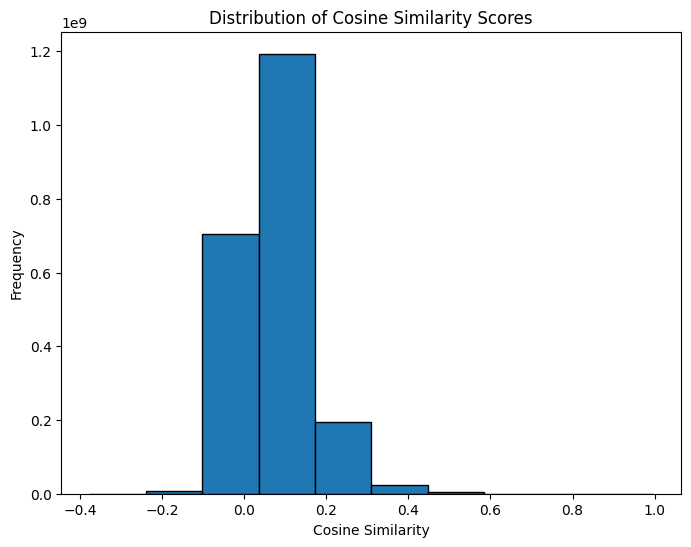

In [38]:
# Plot the distribution of cosine similarity scores for entire emote embedding space
plt.figure(figsize=(8, 6))
plt.hist(similarity_scores, bins=[-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='black')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Scores')
#plt.grid(True)
plt.show()

# Cosine similarity for toxic HasanAbi (and global) emotes to pokimane and xQc emotes

Note that some of the toxic emotes will be global emotes. So we are also computing how similar global emotes we extracted are to Pokimane and xQc emotes

In [27]:
threshold = 0.3 #We chose this threshold after looking at histogram of cosine similarity distribution

In [28]:
print(pokimane_emote_embedding_dict)

{'poki1': array([-0.00100108, -0.00291804, -0.01004408,  0.06963257,  0.03623565,
        0.03042918,  0.0179238 ,  0.00747924,  0.09909864,  0.02307678,
        0.00421059, -0.01656492,  0.06370811, -0.02776579, -0.00350768,
       -0.03124518, -0.04907213,  0.01009874, -0.03712838,  0.05290806,
       -0.02351821,  0.01588711, -0.02640279,  0.01343511, -0.03262477,
        0.00571103,  0.04902562, -0.0288002 , -0.0680035 ,  0.00823801,
        0.01487981, -0.03151063,  0.02272706, -0.03868902,  0.05148061,
        0.01825411,  0.04676857, -0.08424146,  0.00612447,  0.01921216,
       -0.01207158,  0.01178646,  0.02767253,  0.02094417,  0.04470912,
       -0.02488355,  0.01951325, -0.00750166, -0.0276691 ,  0.07864705,
        0.03371602,  0.06333493,  0.03113892,  0.09535197, -0.02254673,
        0.08197967,  0.00764193, -0.06743378, -0.00051421, -0.00858861,
       -0.06029057, -0.03085481,  0.03266753,  0.02180505, -0.02602741,
       -0.11444016, -0.09299838, -0.06231407,  0.04571

In [31]:
pokimane_similarity_scores_dict = {} #dictionary to store similarity scores. Key will be the harmful emote in HasanAbi. Value will be dictionary of similarity scores for pokimane emotes that are similar to key (cosine similarity > 0.3)

for emote in harmful_emote_embedding_dict.keys(): #for each harmful emote in HasanAbi's channel
    sim_scores_current_emote_dict = {} #stores similarity scores for current harmful emote vs all pokimane emotes > 0.3  similarity
    
    print(emote)
    max_score = -1
    for channel_emote in pokimane_emote_embedding_dict: #for each pokimane emote
        score = compute_cosine_similarity(harmful_emote_embedding_dict[emote], pokimane_emote_embedding_dict[channel_emote])
        if score > max_score:
            max_score = score
        if score > threshold:
            sim_scores_current_emote_dict[channel_emote] = score

    print(sim_scores_current_emote_dict)
    print(max_score)
    pokimane_similarity_scores_dict[emote] = sim_scores_current_emote_dict


Gayge
{}
0.29514137257661377
monkaS
{'Clap': 0.30784594128566517, 'EZ': 0.35858225433159174, 'WAYTOODANK': 0.34903942610850724}
0.35858225433159174
has0head
{}
0.19969091524025642
hasSammie
{'poki1': 0.31974280243089126, 'poki2': 0.32409278223833743, 'poki3': 0.30936172045645244, 'poki4': 0.3000714680372034, 'pokiDrool': 0.32599530827278134, 'pokiFree': 0.34752762224376943, 'pokiLO': 0.31337203923418394, 'pokiM': 0.3005856084889474, 'pokiPhone': 0.3061600499851054}
0.34752762224376943
PoroSad
{'peepoSad': 0.6404098476675038}
0.6404098476675038
StinkyCheese
{}
0.19322121038585519
hasKapp
{}
0.21272951992699388
hasSilly
{}
0.2204655742200224
KKona
{}
0.27628704816723837
HarleyWink
{}
0.24281819413160582
DarkKnight
{}
0.14851602757475982
TransgenderPride
{}
0.22822125419029704
:P
{'4HEad': 0.4036894259373314}
0.4036894259373314


In [33]:
xQc_similarity_scores_dict = {} #dictionary to store similarity scores. Key will be the harmful emote in HasanAbi. Value will be dictionary of similarity scores for xqc emotes that are similar to key (cosine similarity > 0.3)

for emote in harmful_emote_embedding_dict.keys(): #for each harmful emote in HasanAbis channel
    sim_scores_current_emote_dict = {} #stores similarity scores for current harmful emote vs all xqc emotes > 0.3
    
    print(emote)
    max_score = -1
    for channel_emote in xQc_emote_embedding_dict: #for each xqc emote
        score = compute_cosine_similarity(harmful_emote_embedding_dict[emote], xQc_emote_embedding_dict[channel_emote])
        if score > max_score:
            max_score = score
        if score > threshold:
            sim_scores_current_emote_dict[channel_emote] = score

    print(sim_scores_current_emote_dict)
    print(max_score)
    xQc_similarity_scores_dict[emote] = sim_scores_current_emote_dict

Gayge
{}
0.29514137257661377
monkaS
{'EZ': 0.35858225433159174}
0.35858225433159174
has0head
{}
0.11736112300878868
hasSammie
{}
0.17206881579147745
PoroSad
{}
0.2991111711872069
StinkyCheese
{}
0.15138417008807611
hasKapp
{}
0.16965820806793694
hasSilly
{}
0.1705484721772726
KKona
{}
0.26680094999058146
HarleyWink
{}
0.143952888291802
DarkKnight
{}
0.14790094734527984
TransgenderPride
{}
0.14501727345022775
:P
{}
0.2923068379949357


# Cosine similarity for potentially toxic HasanAbi emotes identified from t-SNE and comparing them to Pokimane and xQc emotes

All of these emotes are colored orange in the t-SNE plot of HasanAbi's embedding space in the embedding_space_visualizer.ipynb file

In [45]:
list_of_potentially_toxic_hasanAbi_emotes = ["hasFatty", "hasPog", "hasGachi", "hasUppy", "hasSleepy", "hasPrime", "hasWhat", "hasBaited", "hasCapital"]

In [46]:
# Create a Pandas Series
potential_toxic_hasanabi_emote_series = pd.Series(list_of_potentially_toxic_hasanAbi_emotes)
potential_toxic_hasanabi_emote_series.name = 'Potential toxic HasanAbi emotes'


In [47]:
potential_toxic_hasanabi_emote_df = potential_toxic_hasanabi_emote_series.to_frame()
print(potential_toxic_hasanabi_emote_df)

  Potential toxic HasanAbi emotes
0                        hasFatty
1                          hasPog
2                        hasGachi
3                         hasUppy
4                       hasSleepy
5                        hasPrime
6                         hasWhat
7                       hasBaited
8                      hasCapital


Mapping potentially toxic HasanAbi emotes to embedding vectors

In [48]:
potential_toxic_hasanabi_emote_df["embedding"] = np.nan

index = 0
for current_emote in potential_toxic_hasanabi_emote_series: #go through each pokimane emote
    
    # Search for the index of where we find this emote in the labels dataframe
    matching_index = labels_df.index[labels_df['word'] == current_emote].tolist()
    
    if len(matching_index) == 0: #maybe emote is stored in lowercase form
        matching_index = labels_df.index[labels_df['word'].str.lower() == current_emote.lower()].tolist()

    if len(matching_index) == 0: #if emote was not found in labels dataframe
        potential_toxic_hasanabi_emote_df.at[index, "embedding"] = "Does not exist"
        index += 1
        continue
    
    #Retrieve the 500 element vector corresponding to this emote using the matching_index
    embedding_vector = embeddings_df.iloc[matching_index[0]].values

    potential_toxic_hasanabi_emote_df.iloc[index, potential_toxic_hasanabi_emote_df.columns.get_loc("embedding")] = np.array_str(embedding_vector)
    index += 1

print(potential_toxic_hasanabi_emote_df)

  Potential toxic HasanAbi emotes  \
0                        hasFatty   
1                          hasPog   
2                        hasGachi   
3                         hasUppy   
4                       hasSleepy   
5                        hasPrime   
6                         hasWhat   
7                       hasBaited   
8                      hasCapital   

                                           embedding  
0  [-2.75282155e-02 -7.13306383e-03 -5.18233792e-...  
1  [-0.04513534 -0.03599326 -0.06944472 -0.021630...  
2  [-5.53637760e-02 -4.71123543e-02 -4.63350520e-...  
3  [ 1.90781992e-04  4.89346561e-03 -1.18102333e-...  
4  [-5.34023747e-03 -5.25344514e-03 -8.56251271e-...  
5  [ 0.0065962   0.05586274 -0.00875389  0.048566...  
6  [-1.17194764e-02 -2.69206025e-02  4.41361934e-...  
7  [-3.67836430e-02 -6.03230211e-02  8.18139508e-...  
8  [-0.0275878  -0.06078357  0.04984396 -0.007257...  


In [52]:
#Read dataframe into dicitonary
potential_toxic_hasanabi_emote_dict = {}

#go through each row
for index, row in potential_toxic_hasanabi_emote_df.iterrows():
    # Remove square brackets and split the string
    elements = row["embedding"].replace('[', '').replace(']', '').split()
    #Convert to numpy array
    arr = np.array(elements, dtype=float)
        
    potential_toxic_hasanabi_emote_dict[row["Potential toxic HasanAbi emotes"]] = arr


print(potential_toxic_hasanabi_emote_dict)

{'hasFatty': array([-2.75282155e-02, -7.13306383e-03, -5.18233792e-02,  4.02802056e-02,
       -4.75907005e-02, -2.07716796e-02,  1.17704331e-02,  3.50388099e-02,
        4.73007939e-02,  1.87486768e-02,  7.33610609e-02,  1.26655226e-02,
       -6.70537505e-03, -4.62489551e-02,  4.48337058e-02, -4.92285488e-02,
       -8.00615016e-02, -9.05162418e-03, -1.69499503e-02,  9.51138663e-02,
        6.76063719e-03, -2.27965455e-02, -4.93697881e-02, -3.11374307e-02,
       -5.81763523e-02, -1.21801247e-02, -2.34552692e-02,  2.93917079e-02,
       -5.80126881e-03,  1.54803405e-02, -4.91458719e-03, -4.93632338e-03,
        4.11592991e-02, -2.72539403e-02, -1.25016183e-02, -2.42498057e-02,
       -6.62709328e-02, -7.36054764e-02, -6.45688048e-03, -1.12462789e-01,
        5.26555038e-02,  3.22142059e-02, -6.82453115e-05,  3.21509722e-03,
        1.30106742e-01, -1.06736887e-02,  5.86091596e-02,  6.98840253e-02,
       -8.72903605e-03,  8.86912454e-03,  2.70543038e-02,  3.07280367e-02,
        1.62

In [53]:
potentially_toxic_similarity_scores_dict = {} #dictionary to store similarity scores.

for emote in potential_toxic_hasanabi_emote_dict.keys(): 
    sim_scores_current_emote_dict = {} #stores similarity scores for current harmful emote vs all pokimane emotes > 0.3  similarity
    
    print(emote)
    max_score = -1
    for channel_emote in pokimane_emote_embedding_dict: #for each pokimane emote
        score = compute_cosine_similarity(potential_toxic_hasanabi_emote_dict[emote], pokimane_emote_embedding_dict[channel_emote])
        if score > max_score:
            max_score = score
        if score > threshold:
            sim_scores_current_emote_dict[channel_emote] = score

    print(sim_scores_current_emote_dict)
    print(max_score)
    potentially_toxic_similarity_scores_dict[emote] = sim_scores_current_emote_dict


hasFatty
{'poki1': 0.32956776662055765, 'poki2': 0.337470335684995, 'poki3': 0.3254588477696763, 'poki4': 0.3459327048885119, 'pokiClout': 0.3146059849443004, 'pokiDrool': 0.4330719038288108, 'pokiFree': 0.4420495885772999, 'pokiLO': 0.3589587857705591, 'pokiM': 0.33622173853013543, 'pokiMimi': 0.30257776729772096, 'pokiPhone': 0.40221835226530084, 'pokiSub': 0.3804780000094203}
0.4420495885772999
hasPog
{'pokiFree': 0.3221302200179029, 'pokiPhone': 0.3339615198615985}
0.3339615198615985
hasGachi
{'pokiFree': 0.30904697393718134, 'pokiLO': 0.3001222810032123, 'pokiPhone': 0.3034886889928539, 'pokiPride': 0.3182731627302113}
0.3182731627302113
hasUppy
{'poki1': 0.39588450413804244, 'poki2': 0.3892605683534929, 'poki3': 0.4048737478196138, 'poki4': 0.40747351027470313, 'pokiBonk': 0.327427994136639, 'pokiChair': 0.35178598113838866, 'pokiClout': 0.3089157452685712, 'pokiDrool': 0.3078927904093885, 'pokiFree': 0.4504409821116969, 'pokiGUN': 0.33595364370002884, 'pokiLO': 0.397853473619475

In [54]:
potentially_toxic_similarity_scores_dict = {} #dictionary to store similarity scores.

for emote in potential_toxic_hasanabi_emote_dict.keys(): 
    sim_scores_current_emote_dict = {} #stores similarity scores for current harmful emote vs all xqc emotes > 0.3  similarity
    
    print(emote)
    max_score = -1
    for channel_emote in xQc_emote_embedding_dict: #for each xqc emote
        score = compute_cosine_similarity(potential_toxic_hasanabi_emote_dict[emote], xQc_emote_embedding_dict[channel_emote])
        if score > max_score:
            max_score = score
        if score > threshold:
            sim_scores_current_emote_dict[channel_emote] = score

    print(sim_scores_current_emote_dict)
    print(max_score)
    potentially_toxic_similarity_scores_dict[emote] = sim_scores_current_emote_dict

hasFatty
{}
0.2021461734293088
hasPog
{}
0.20150012730178682
hasGachi
{}
0.19561092576069913
hasUppy
{}
0.2603269143935436
hasSleepy
{}
0.22265090943024532
hasPrime
{}
0.2701053166840896
hasWhat
{}
0.16831709135914943
hasBaited
{}
0.13572566519403542
hasCapital
{}
0.28281117174307413
